In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress = True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
sns.set_style(style='darkgrid')

In [2]:
data = pd.read_csv('column_2C_weka.csv')
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
data['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [4]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [5]:
# There are no missing values

In [6]:
df = data.drop('class',1)
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


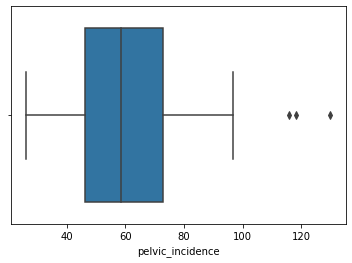

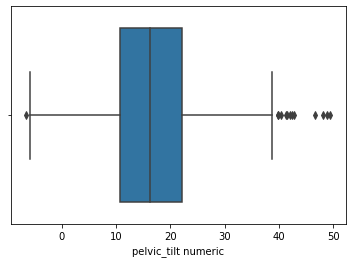

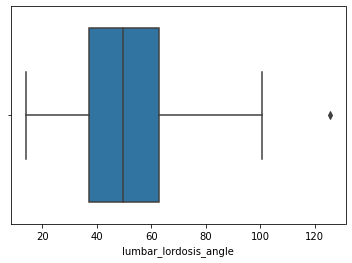

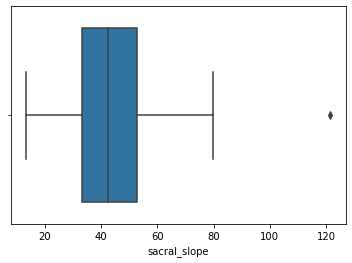

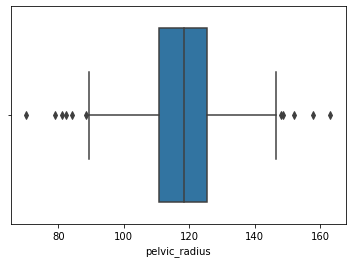

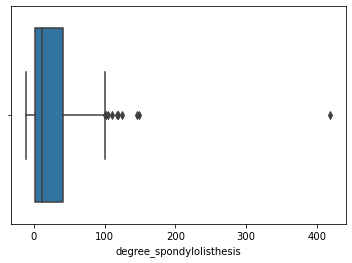

In [7]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

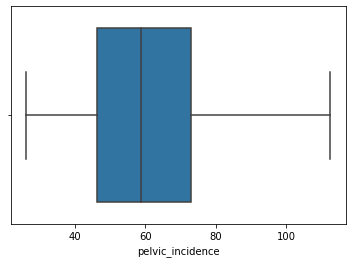

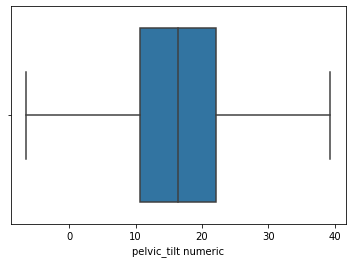

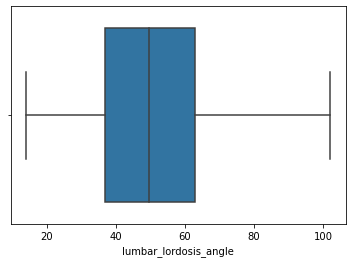

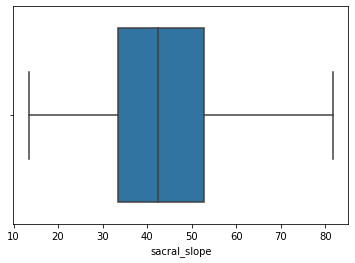

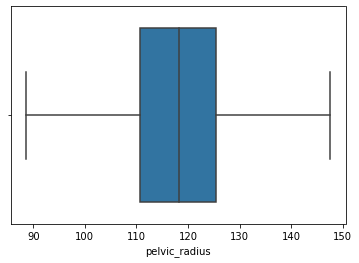

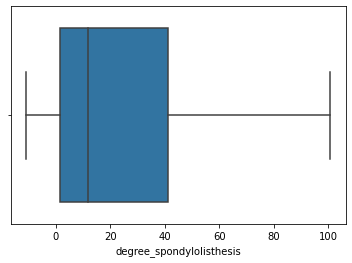

In [8]:
for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    ll = q1 - 1.5*IQR
    ul = q3 + 1.5*IQR
    for j in df.index:
        if df.loc[j,i] < ll:
            df.loc[j,i] = ll
        if df.loc[j,i] >ul:
            df.loc[j,i] = ul
for i in df.columns:
    sns.boxplot(x= df[i])
    plt.show()

In [ ]:
# All the outliers have been Capped

## K-means Clustering

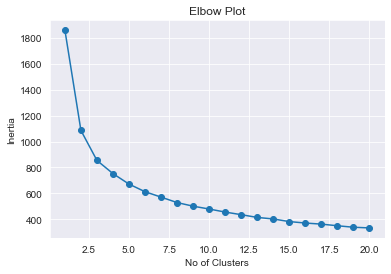

In [12]:
scalar = StandardScaler()
df_sc = scalar.fit_transform(df)
df_sc = pd.DataFrame(data=df_sc,columns=df.columns)
df_sc
err = []
for i in range(1,21):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df_sc)
    err.append(km.inertia_)

plt.plot(range(1,21),err,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [13]:
for i in range(2,15):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(df_sc)
    print('silhouette_score for', i, 'clusters is', silhouette_score(df_sc,km.labels_))

silhouette_score for 2 clusters is 0.37080681865794096
silhouette_score for 3 clusters is 0.3050263450545486
silhouette_score for 4 clusters is 0.27417827951673607
silhouette_score for 5 clusters is 0.21388849555354958
silhouette_score for 6 clusters is 0.2031810194367797
silhouette_score for 7 clusters is 0.20437842692576783
silhouette_score for 8 clusters is 0.20233433768773304
silhouette_score for 9 clusters is 0.20126762874325807
silhouette_score for 10 clusters is 0.19133788294401263
silhouette_score for 11 clusters is 0.19167003604344907
silhouette_score for 12 clusters is 0.1926215793176365
silhouette_score for 13 clusters is 0.18866661522889758
silhouette_score for 14 clusters is 0.18803865894993724


In [29]:
model = KMeans(n_clusters=2,random_state=100)
model.fit(df_sc)
model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [30]:
df_k = df.copy()
df_k['Label'] = model.labels_
df_k

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


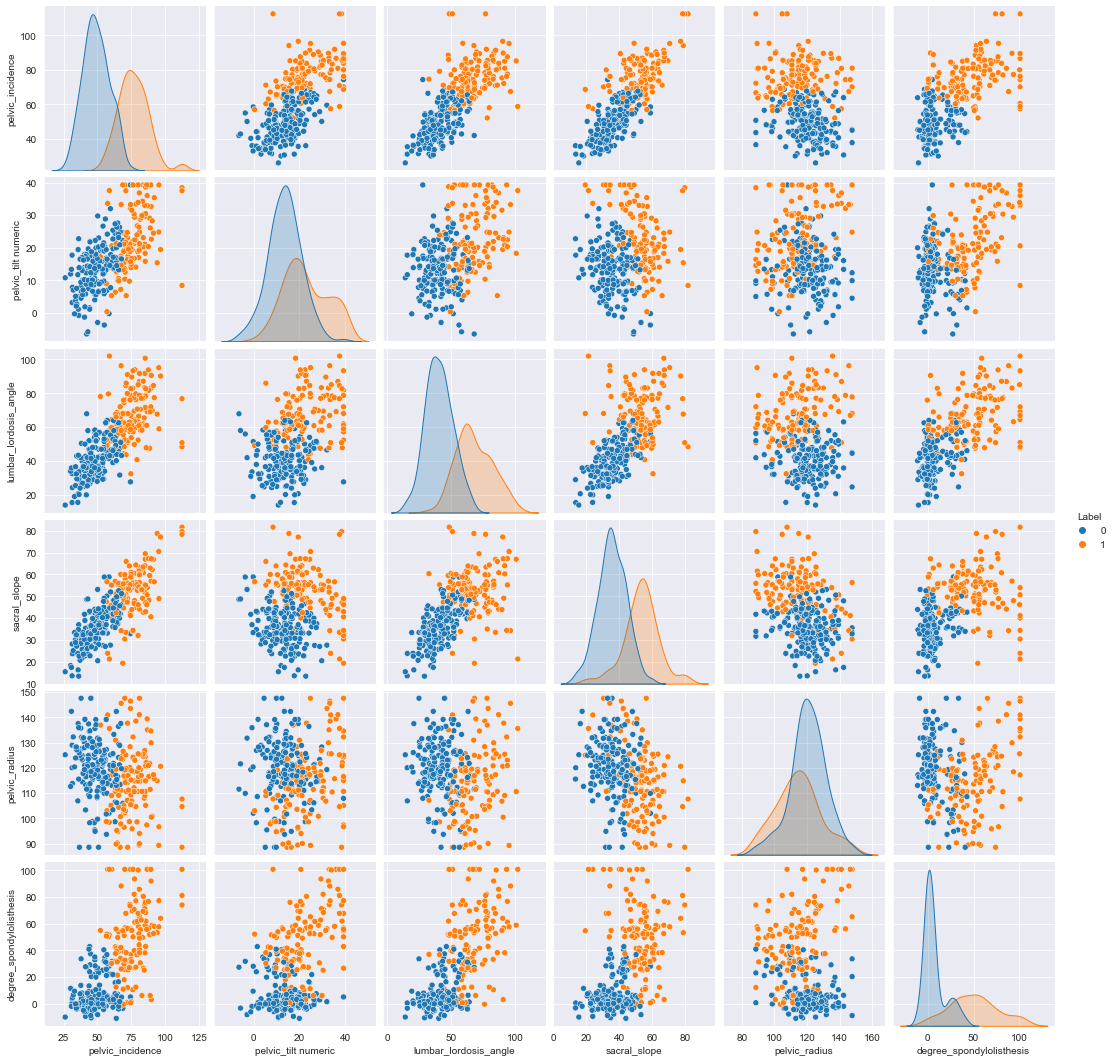

In [34]:
sns.pairplot(df_k,hue='Label')
plt.show()

#### Inference
1. pelvic_incidence and pelvic_tilt numeric have good correlation
2. The cluster 0 is always on the lower end of the plots
3. There is high overlapping between pelvic_tilt and pelvic_radius
4. lumbar_lordosis_angle and pelvic_radius have high overlap
5. sacral_slope and lumbar_lordosis_angle are highly correlated
6.  Plevic_radius is not highly correlated with any other features

## Agglomarative Clustering

In [19]:
link = ['single','complete','average','centroid','ward']
for i in link:
    z = linkage(df_sc,method=i)
    c,copf_dist = cophenet(z,pdist(df_sc))
    print(i, c)

single 0.584531288047458
complete 0.6567155492232446
average 0.700030660811454
centroid 0.7190384160735992
ward 0.544393182786389


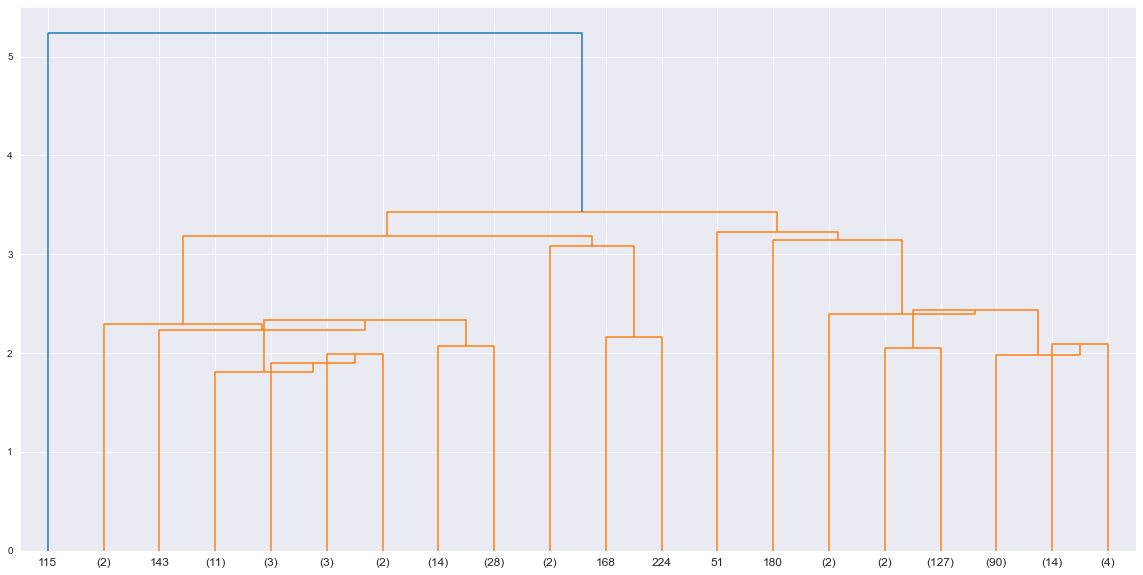

In [20]:
z = linkage(df_sc,method='centroid')
plt.figure(figsize=(20,10))
dendrogram(z, truncate_mode = 'lastp',p=20)
plt.show()

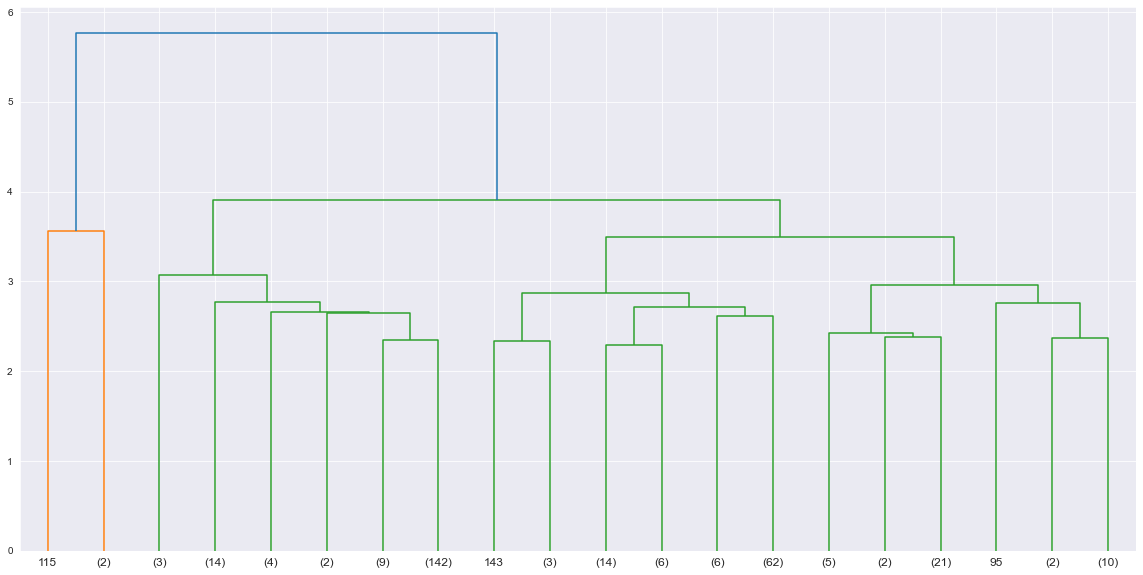

In [21]:
z = linkage(df_sc,method='average')
plt.figure(figsize=(20,10))
dendrogram(z, truncate_mode = 'lastp',p=20)
plt.show()

In [22]:
for i in range(2,10):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(df_sc)
    sil_score = silhouette_score(df_sc,agc.labels_)
    print(i, 'clusters- ',sil_score)

2 clusters-  0.2994089079793983
3 clusters-  0.26360424326642207
4 clusters-  0.2549636024924993
5 clusters-  0.2504923902667723
6 clusters-  0.19387447642743366
7 clusters-  0.19200341988036332
8 clusters-  0.19446035176727458
9 clusters-  0.19836597322888974


In [38]:
agc = AgglomerativeClustering(n_clusters=3,linkage='average')
agc.fit(df_sc)
agc.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,

In [39]:
df_h = df.copy()
df_h['Label'] = agc.labels_
df_h

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,2
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,2
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,2
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,2
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,2
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,2
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,2
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,2
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,2


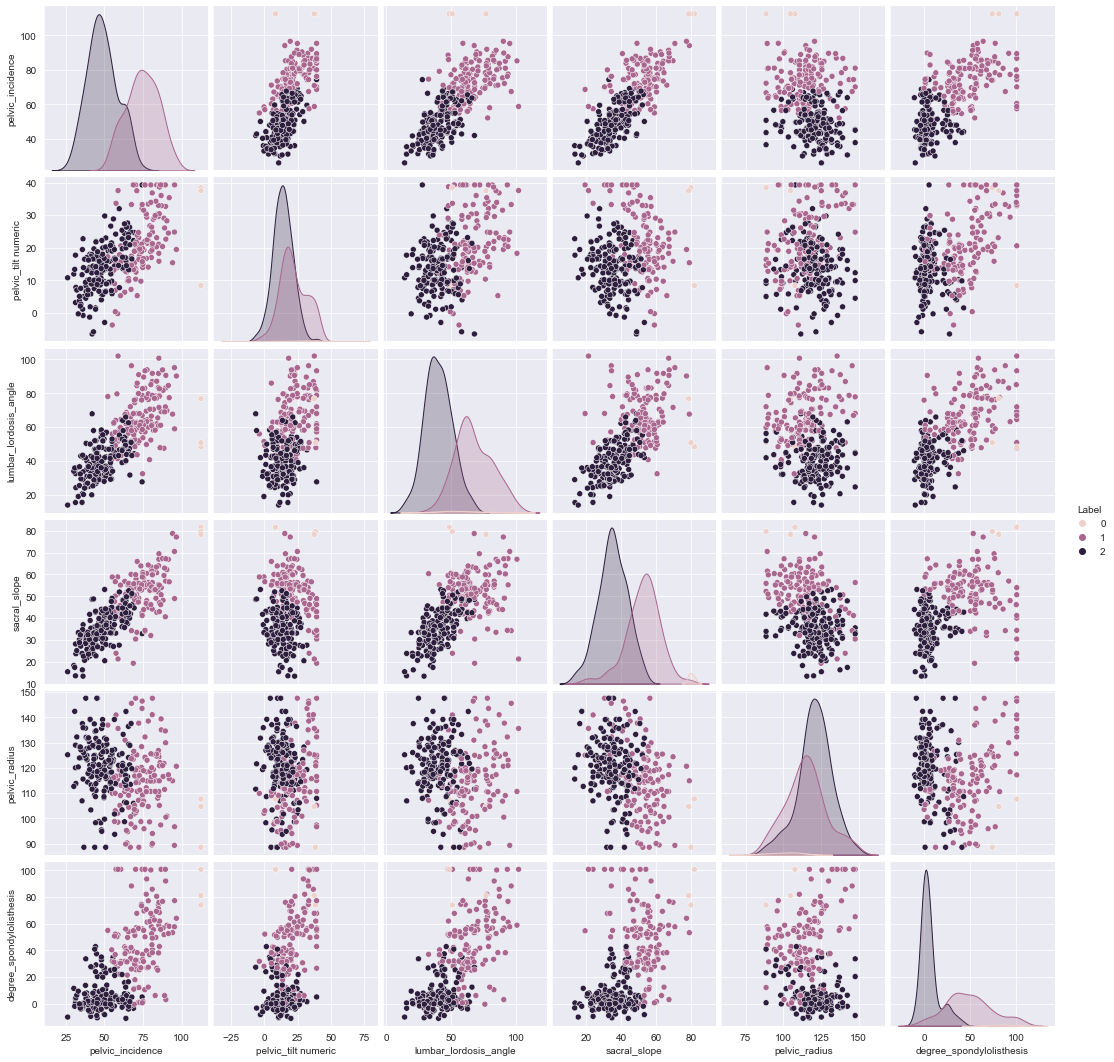

In [40]:
sns.pairplot(df_h,hue='Label')
plt.show()

#### Inference
1. pelvic_incidence and pelvic_tilt numeric have good correlation
2. The cluster 2 is always on the lower end of the plots
3. There is high overlapping between pelvic_tilt and pelvic_radius
4. lumbar_lordosis_angle and pelvic_radius have high overlap
5. sacral_slope and lumbar_lordosis_angle are highly correlated
6. Plevic_radius is not highly correlated with any other features
7. In all the graphs there are a few outlier values with minimum nos.

In [32]:
X = df_k.drop('Label',1)
y = df_k.Label
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeClassifier
dt_k = DecisionTreeClassifier()
dt_k.fit(Xtrain,ytrain)
y_pred_dt_k = dt_k.predict(Xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,y_pred_dt_k)

0.9838709677419355

In [33]:
X = df_h.drop('Label',1)
y = df_h.Label
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=100)
from sklearn.tree import DecisionTreeClassifier
dt_h = DecisionTreeClassifier()
dt_h.fit(Xtrain,ytrain)
y_pred_dt_h = dt_h.predict(Xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,y_pred_dt_h)

1.0

In [35]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [36]:
df_k['Label'].value_counts()

0    181
1    129
Name: Label, dtype: int64

INFERENCE:-K_MEANS HAVE CLUSTERED 'CLASS' FEATURE ALMOST SIMILAR TO  ORGINAL DATASET


In [37]:
df_h['Label'].value_counts()

0    307
1      3
Name: Label, dtype: int64

INFERENCE:-HIERARCHY HAVE NOT CLUSTERED 'CLASS' FEATURE SIMILAR TO  ORGINAL DATASET

###### INFERENCE:-
    WE GO WITH K_MEANS FOR CLUSTERING.